In [42]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict as dd

In [54]:
file = open("train.json")

In [55]:
data = json.load(file)

In [10]:
len(data)
years = []

In [12]:
for item in data:
    years.append(item['year'])

In [14]:
list(set(years))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [17]:
#!pip3 install torch
import torch
# Create matrices with entries drawn from the standard normal, and multiply them
x_pt = torch.randn(size=[4,4])
y_pt = torch.randn(size=[4,8])
z_pt = torch.matmul(x_pt, y_pt)
z_pt

tensor([[-3.7245, -0.4107, -1.8221,  0.8584, -1.4210, -4.8257, -0.9154, -2.4501],
        [-1.8123, -2.5821,  5.1923,  2.7901,  3.2973, -3.9514, -2.3031,  2.4315],
        [-1.3746,  0.9364, -1.8270,  4.6121,  1.7852, -2.6717,  0.7162, -5.7360],
        [ 0.0375,  0.6626, -1.3692, -1.4131, -1.4553,  0.0989,  0.4685, -1.4410]])

In [19]:
data[0]

{'authors': [42, 13720, 36],
 'year': 9,
 'abstract': [2455,
  1858,
  2335,
  1543,
  1800,
  1860,
  2000,
  2867,
  1546,
  1874,
  2059,
  1525,
  2590,
  4196,
  12,
  2634,
  1543,
  1800,
  1586,
  2866,
  3595,
  1866,
  1670,
  2000,
  3743,
  1542,
  1650,
  1527,
  33,
  4407,
  1543,
  1535,
  1962,
  1961,
  1543,
  33,
  1700,
  1543,
  1535,
  1647,
  1546,
  1580,
  4720,
  12,
  1731,
  4231,
  2601,
  1553,
  1704,
  1605,
  2456,
  1543,
  3281,
  1594,
  4407,
  2168,
  1542,
  1586,
  3781,
  2471,
  1525,
  1859,
  1669,
  2512,
  4572,
  1546,
  1609,
  3781,
  2471,
  1525,
  3393,
  12,
  37,
  1712,
  1586,
  4196,
  1650,
  1527,
  3281,
  1594,
  4407,
  1800,
  4708,
  1904,
  2059,
  2411,
  12],
 'venue': 20,
 'title': [41,
  1550,
  1563,
  1594,
  1544,
  1919,
  1644,
  37,
  1539,
  1715,
  1553,
  1541,
  1536,
  1532,
  1872,
  1538]}

In [56]:
#Read into a dataframe.
data_f = pd.read_json("train.json")
data_f["author"] = data_f["authors"]
#pd.json_normalize(data, record_path = ['authors'])

In [61]:
data_expand = data_f.explode("author")
data_expand

,authors,year,abstract,venue,title,author
0,"[42, 13720, 36]",9,"[2455, 1858, 2335, 1543, 1800, 1860, 2000, 286...",20,"[41, 1550, 1563, 1594, 1544, 1919, 1644, 37, 1...",42
0,"[42, 13720, 36]",9,"[2455, 1858, 2335, 1543, 1800, 1860, 2000, 286...",20,"[41, 1550, 1563, 1594, 1544, 1919, 1644, 37, 1...",13720
0,"[42, 13720, 36]",9,"[2455, 1858, 2335, 1543, 1800, 1860, 2000, 286...",20,"[41, 1550, 1563, 1594, 1544, 1919, 1644, 37, 1...",36
1,"[1359, 15881, 45]",15,"[40, 1542, 1691, 2449, 1535, 3616, 2206, 1904,...",2,"[1731, 47, 11, 57, 4624, 1525, 1535, 47, 11, 3...",1359
1,"[1359, 15881, 45]",15,"[40, 1542, 1691, 2449, 1535, 3616, 2206, 1904,...",2,"[1731, 47, 11, 57, 4624, 1525, 1535, 47, 11, 3...",15881
...,...,...,...,...,...,...
25792,"[281, 2963, 9046, 3318, 4575, 2246, 395]",14,"[1555, 1544, 3429, 1866, 4012, 33, 3080, 4172,...",9,"[56, 48, 1588, 2374, 47, 1695, 1609, 1641, 157...",9046
25792,"[281, 2963, 9046, 3318, 4575, 2246, 395]",14,"[1555, 1544, 3429, 1866, 4012, 33, 3080, 4172,...",9,"[56, 48, 1588, 2374, 47, 1695, 1609, 1641, 157...",3318
25792,"[281, 2963, 9046, 3318, 4575, 2246, 395]",14,"[1555, 1544, 3429, 1866, 4012, 33, 3080, 4172,...",9,"[56, 48, 1588, 2374, 47, 1695, 1609, 1641, 157...",4575
25792,"[281, 2963, 9046, 3318, 4575, 2246, 395]",14,"[1555, 1544, 3429, 1866, 4012, 33, 3080, 4172,...",9,"[56, 48, 1588, 2374, 47, 1695, 1609, 1641, 157...",2246


In [64]:
#expand = pd.DataFrame({"author":data.apply(lambda x: pd.Series(data['authors']),axis=1).stack().reset_index(level=1, drop=True),})
#init_lst = []
#for item in data:
#    for author in item['authors']:
#        init_lst.append()
data_prolific = data_expand[data_expand['author'] < 100]
#data_prolific

,authors,year,abstract,venue,title,author
0,"[42, 13720, 36]",9,"[2455, 1858, 2335, 1543, 1800, 1860, 2000, 286...",20,"[41, 1550, 1563, 1594, 1544, 1919, 1644, 37, 1...",42
0,"[42, 13720, 36]",9,"[2455, 1858, 2335, 1543, 1800, 1860, 2000, 286...",20,"[41, 1550, 1563, 1594, 1544, 1919, 1644, 37, 1...",36
1,"[1359, 15881, 45]",15,"[40, 1542, 1691, 2449, 1535, 3616, 2206, 1904,...",2,"[1731, 47, 11, 57, 4624, 1525, 1535, 47, 11, 3...",45
3,[97],10,"[46, 1624, 1547, 56, 1687, 1644, 6, 7, 3386, 1...",4,"[40, 1733, 1735, 1540, 1655, 46, 1624, 1547, 5...",97
4,"[19617, 2]",10,"[37, 3709, 3836, 1586, 2151, 1727, 3021, 1860,...",9,"[38, 1592, 2088, 1543, 1574, 1727, 1597, 1813,...",2
...,...,...,...,...,...,...
25767,"[19974, 68, 8903]",1,"[40, 1542, 1691, 2449, 1535, 2855, 1549, 1755,...",23,"[1708, 33, 58, 57, 2174, 1548, 1538, 1553, 359...",68
25776,"[6353, 67, 3037, 15856, 13521]",10,"[40, 1542, 1691, 2907, 1540, 1535, 2121, 2431,...",10,"[53, 2555, 4480, 1535, 1637, 1898, 1549, 53, 3...",67
25778,"[7686, 3810, 87, 7451]",16,"[2144, 1661, 2151, 1966, 3776, 4864, 1546, 219...",31,"[1615, 1966, 11, 3238, 1653, 3318, 24, 2144, 1...",87
25781,"[14864, 92]",16,"[37, 1662, 33, 1814, 2036, 1692, 1553, 2333, 2...",0,"[46, 1670, 1826, 37, 1632, 46, 1991, 1525, 152...",92


In [76]:
#The other data can be summarised
data_author = data_prolific.groupby(['author', 'year']).size()
print(data_author)
data_author.to_csv('year_authors.csv')

author  year
0       0       2
        1       2
        2       5
        3       7
        4       5
               ..
99      11      1
        12      2
        15      1
        16      3
        17      1
Length: 1566, dtype: int64


(array([ 820., 1111., 1477., 1842., 1403., 3029., 3207., 3802., 4397.,
        4705.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <BarContainer object of 10 artists>)

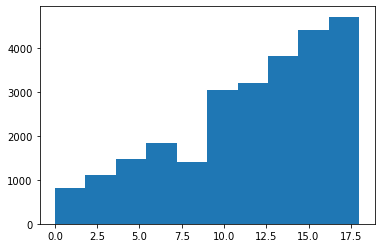

In [22]:
plt.hist(years)

<BarContainer object of 8938 artists>

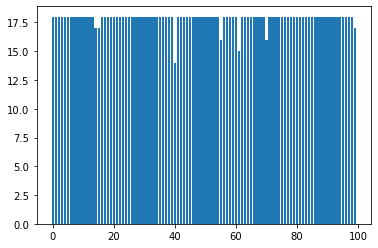

In [34]:
#Iterate through and list the authors and years
authors = []
years = []
for item in data:
    item_authors = item['authors']
    item_year = item['year']
    for author in item_authors:
        #print(author)
        if int(author) < 100:
            #print(author)
            authors.append(author)
            years.append(item_year)

#Subsequently combine and plot.
#print(author)
plt.bar(authors, years)

In [36]:
data[0] 

{'authors': [42, 13720, 36],
 'year': 9,
 'abstract': [2455,
  1858,
  2335,
  1543,
  1800,
  1860,
  2000,
  2867,
  1546,
  1874,
  2059,
  1525,
  2590,
  4196,
  12,
  2634,
  1543,
  1800,
  1586,
  2866,
  3595,
  1866,
  1670,
  2000,
  3743,
  1542,
  1650,
  1527,
  33,
  4407,
  1543,
  1535,
  1962,
  1961,
  1543,
  33,
  1700,
  1543,
  1535,
  1647,
  1546,
  1580,
  4720,
  12,
  1731,
  4231,
  2601,
  1553,
  1704,
  1605,
  2456,
  1543,
  3281,
  1594,
  4407,
  2168,
  1542,
  1586,
  3781,
  2471,
  1525,
  1859,
  1669,
  2512,
  4572,
  1546,
  1609,
  3781,
  2471,
  1525,
  3393,
  12,
  37,
  1712,
  1586,
  4196,
  1650,
  1527,
  3281,
  1594,
  4407,
  1800,
  4708,
  1904,
  2059,
  2411,
  12],
 'venue': 20,
 'title': [41,
  1550,
  1563,
  1594,
  1544,
  1919,
  1644,
  37,
  1539,
  1715,
  1553,
  1541,
  1536,
  1532,
  1872,
  1538]}

In [39]:
#Apply sedata[0] 
print(len(data[0]['abstract']))
len(set(data[0]['abstract']))

87


57

In [40]:
87/57

1.5263157894736843

In [41]:
#Apply sedata[0] 
print(len(data[0]['title']))
len(set(data[0]['title']))

16


16

In [ ]:

def calculate_statistics(lst, k=0):
    #See if k is non-zero. If so we run feature selection.
    frequencies = dd(int)
    if k > 0:
        #Select the k most repeated numbers.
        #If this is less than k sort the remaining.
        for item in lst:
            dd[str(item)] += 1
        #Then sort the list.
        
    